### Table of Contents

* [Goals](#goals)
* [Data Source](#data_source)
* [Import Python Modules](#import)
* [Loading the Data](#load)
* [Explore and Clean Data](#explore_clean)
* [Exploratory Plots](#plots)
* [Conclusions](#conclusion)

### Goals <a class="anchor" id="Goals"></a>

This notebook contains an analysis on GDP and life expectancy data from the World Health Organization and the World Bank.

The goal for this project was to practice data analysis and do the following:
* Get acquainted with the data
* Clean the data so it is ready for analysis
* Prepare plots & supporting visualizations

Here are a few questions that this project will seek to answer:
+ Has life expectancy increased over time?
+ Has GDP increased over time?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in selected nations?
+ What is the distribution of life expectancy?


### Data Source <a class="anchor" id="data_source"></a>

* GDP: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD)
* Life expectancy Data: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

### Import Python Modules <a class="anchor" id="import"></a>

In [70]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sbn
%matplotlib inline

### Loading the Data <a class="anchor" id="load"></a>

In [5]:
data = pd.read_csv("all_data.csv")
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


### Explore and Clean Data <a class="anchor" id="explore_clean"></a>

Data: 96 rows, 4 columns

In [8]:
data.shape

(96, 4)

No null values and also no duplicates:

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [23]:
duplicates = data[data.duplicated()]
print(f"Duplicated rows: {duplicates}")

Duplicated rows: Empty DataFrame
Columns: [Country, Year, Life expectancy at birth (years), GDP]
Index: []


Check which countries and what years are in data: 6 countries and data from 2000 till 2015

In [18]:
print(data.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [20]:
print(data.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


The `rename` function is used to change the column name to `LEABY`.

In [133]:
data = data.rename({'Life expectancy at birth (years)':'LEABy'}, axis = 'columns')
data.head()

,Country,Year,LEABy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


### Exploratory Plots <a class="anchor" id="plots"></a>

The distribution of `GDP` in the data is right skewed as most of the values are on the left-hand side. On the contrary the distribution of `LEABy` in the data is very left skewed where most of the values are on the right-hand side. 


Text(0.5, 9.444444444444438, 'GDP [Trillions $]')

<Figure size 800x600 with 0 Axes>

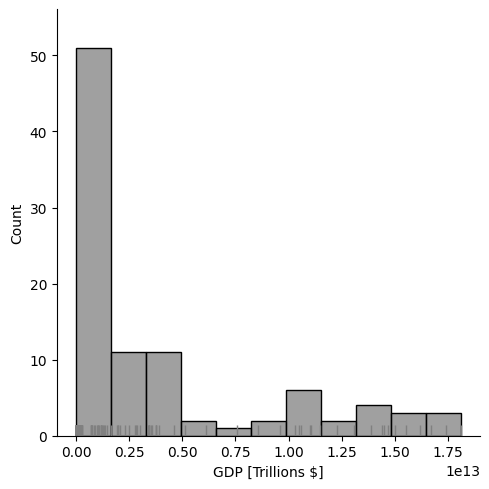

In [39]:
plt.figure(figsize=(8,6))
sbn.displot(data.GDP, rug = True, color='grey')
plt.xlabel('GDP [Trillions $]')

Text(0.5, 9.444444444444438, 'Life Expectancy After Birth [years]')

<Figure size 800x600 with 0 Axes>

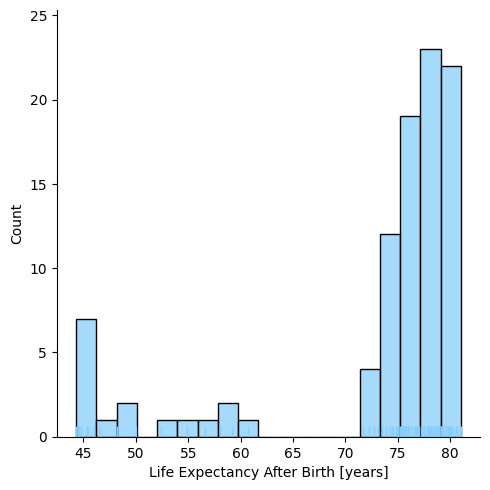

In [91]:
plt.figure(figsize=(8,6))
sbn.displot(data.LEABy, rug = True, color='lightskyblue')
plt.xlabel('Life Expectancy After Birth [years]')

Find average GDP and LEABy by Country:

In [132]:
dataMeans = data.drop('Year', axis = 1).groupby('Country').mean().reset_index()
dataMeans

,Country,LEABy,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


Median Life Expectancy by Country plot: all of the countries except for Zimbabwe have values in the mid-to-high 70s.

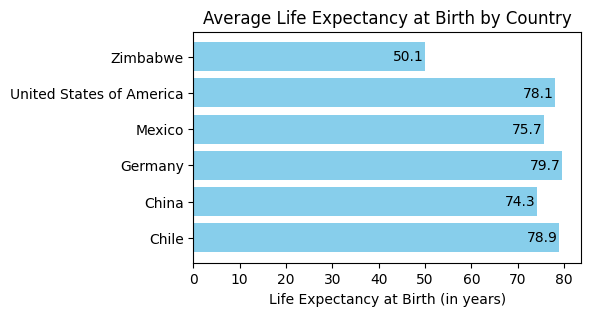

In [93]:
fig, ax = plt.subplots(figsize=(5,3))

bar_chart = ax.barh(dataMeans.Country, dataMeans.LEABy, color='skyblue')

for bar in bar_chart:
    width = bar.get_width()
    label_x_pos = width - 7  # Position label at the end of the bar
    ax.text(label_x_pos, bar.get_y() + bar.get_height() / 2,
        f'{width:.1f}',  # Format to one decimal place
        va='center', ha='left', color='black')

ax.set_title('Average Life Expectancy at Birth by Country')
ax.set_xlabel('Life Expectancy at Birth (in years)')

plt.show()

Similarly, let's plot medium GDP per country!

For the average `GDP` by `Country` there are major differences. The US has a much higher value compared to the rest of the countries - Zimbabwe is not even visible where Chile is just barely seen. hina, Germany and Mexico seem to be relatively close in GDP values.

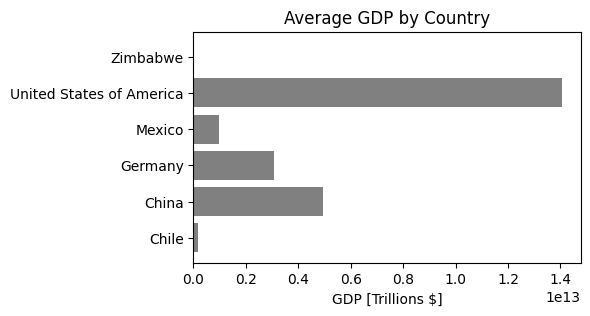

In [131]:
fig, ax = plt.subplots(figsize=(5,3))

bar_chart = ax.barh(dataMeans.Country, dataMeans.GDP, color='grey')

ax.set_title('Average GDP by Country')
ax.set_xlabel('GDP [Trillions $]')

plt.show()

In `GDP` plot, Chile and Zimbabwe have a vertical line of dots that illustrate the number of data points that fall around the same values - there seem to be no such huge change in GDP over years as in case of those countries. On the other hand, the US and China seem to have experienced a huge GDP increase.
When it comes to `Life Expectancy at Birth`, Zimbabwe has the longest line of dots - that means life expectancy has changed the most over time.

Let's check if that's true and line charts for those countries will confirm that!

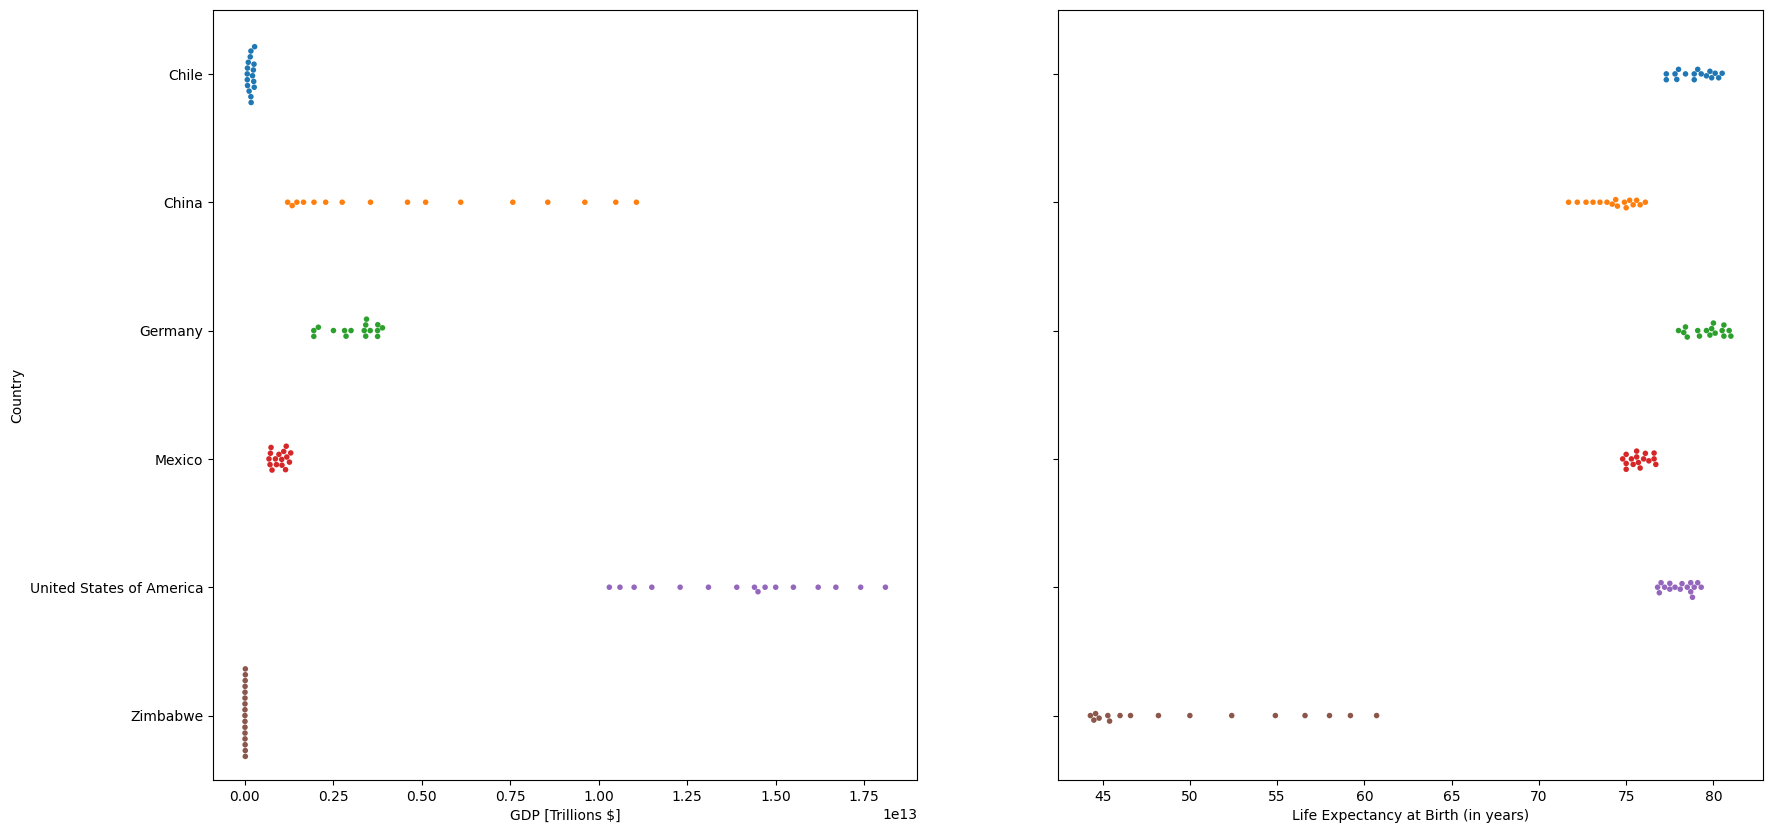

In [108]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(20, 10))

sns.swarmplot(ax=axes[0], x='GDP', y='Country', hue='Country', data=data, size=4)
axes[0].set_xlabel('GDP [Trillions $]')

sns.swarmplot(ax=axes[1], x='LEABy', y='Country', hue='Country', data=data, size=4)
axes[1].set_xlabel('Life Expectancy at Birth (in years)')

plt.show()

Between 2000 and 2015, the US and China experienced significant `GDP` growth compared to other countries. Chile and Zimbabwe, in contrast, showed relatively stable trends with minimal increases.

When in comes to `Life Expectancy at Birth`Zimbabwe stands out with the highest increase during the same period. The other countries exhibited steady and gradual growth, with China showing a slightly faster rate of increase.

This is matching the trend observed in swarmplots! 👌

Text(0, 0.5, 'GDP [Trillions $]')

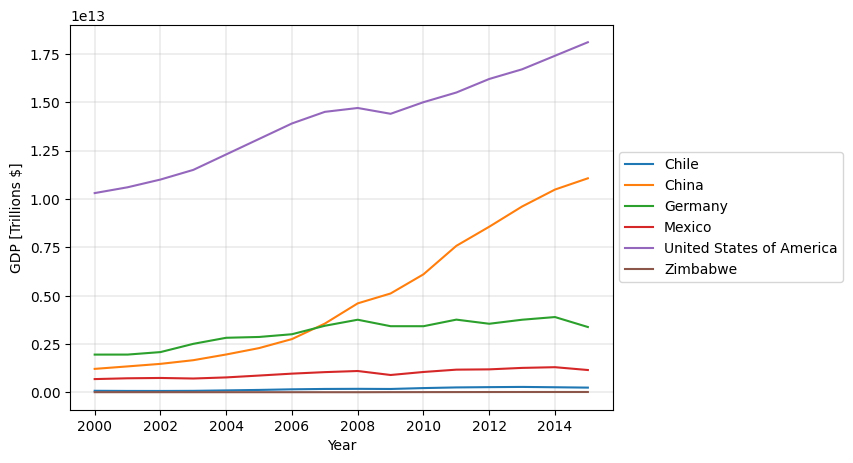

In [117]:
plt.figure(figsize=(7,5))
sbn.lineplot(x=data.Year, y=data.GDP, hue=data.Country)
plt.grid(visible=True,which='both',axis='both',linewidth=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel('GDP [Trillions $]')

Text(0, 0.5, 'Life Expectancy at Birth (in years)')

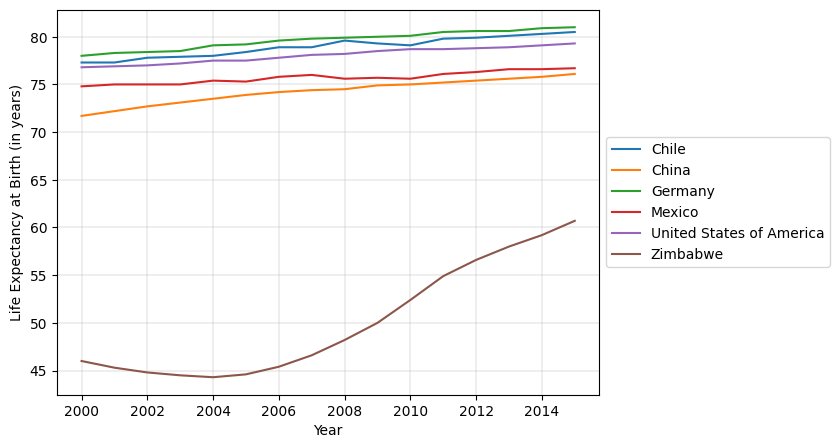

In [118]:
plt.figure(figsize=(7,5))
sbn.lineplot(x=data.Year, y=data.LEABy, hue=data.Country)
plt.grid(visible=True,which='both',axis='both',linewidth=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel('Life Expectancy at Birth (in years)')

The is one more question left! Yes, let's check if there is a correlation between `GDP` and `Life Expectancy at Birth`!

It looks like the previous charts as Zimbabwe's GDP appears stable over time, while its Life Expectancy shows an upward trend. In contrast, other countries generally exhibit an increase in Life Expectancy as GDP rises. The US and China demonstrate similar slopes in their GDP-Life Expectancy relationship.

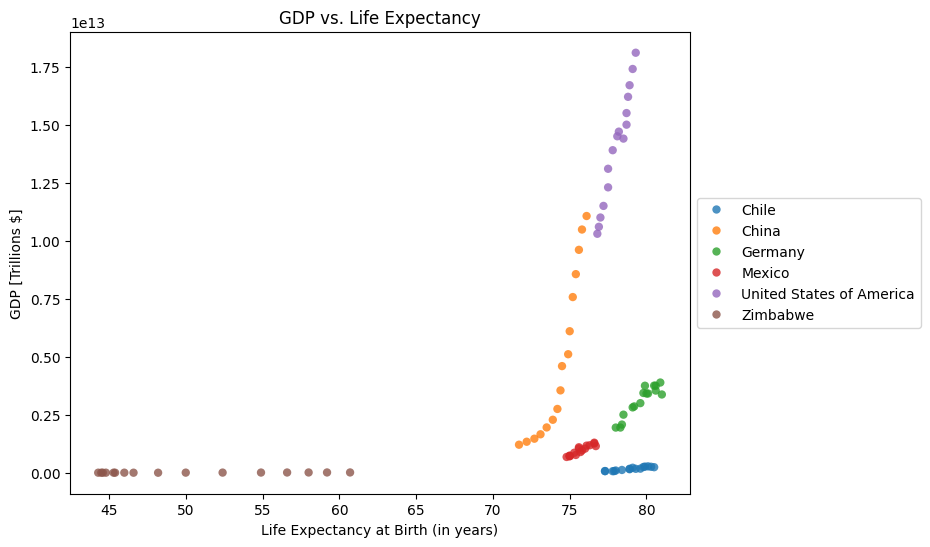

In [123]:
plt.figure(figsize=(8, 6))
scatterplot = sbn.scatterplot(x='LEABy', y='GDP', hue='Country', data=data, 
                              alpha=0.8, edgecolor='none')

plt.title('GDP vs. Life Expectancy')
plt.xlabel('Life Expectancy at Birth (in years)')
plt.ylabel('GDP [Trillions $]')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.show()

Similar to a previous plot, each country is depicted in separate scatter plots across facets. The US, Mexico, and Zimbabwe show linear relationships between GDP and life expectancy. China's relationship appears slightly exponential, while Chile's resembles a logarithmic curve. Overall, there is a noticeable trend of increasing GDP correlating with higher life expectancy, indicating a positive correlation.

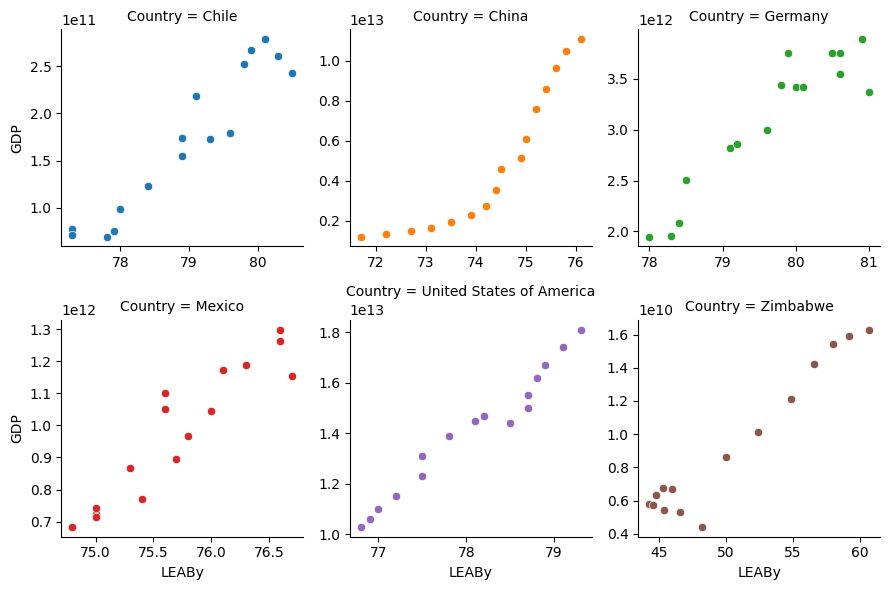

In [130]:
graph = sbn.FacetGrid(data, col='Country', col_wrap=3,
                      hue='Country', sharey=False, sharex=False)

graph = (graph.map(sns.scatterplot, 'LEABy', 'GDP'))

plt.show()

### Conclusions <a class="anchor" id="conclusion"></a>

This project successfully created several data visualizations using a dataset with 96 rows and 4 columns.

It also addressed several initial questions:

* Has life expectancy increased over time in the six nations?
Yes, life expectancy has increased overall, with Zimbabwe showing the greatest increase.

* Has GDP increased over time?
GDP has increased for all countries in the dataset, with notable growth observed in China.

* Is there a correlation between GDP and life expectancy of a country?
Yes, there is a positive correlation between GDP and life expectancy among the countries analyzed.

* What is the average life expectancy in these nations?
The average life expectancy ranged from the mid to high 70s across most countries, except Zimbabwe, which was significantly lower at 50.

* What is the distribution of life expectancy?
The distribution of life expectancy skewed left, indicating that most observations were concentrated towards higher life expectancy values."